#See if I can plot the grid

In [1]:
#pip install pyschism

In [2]:
#pip install cartopy

In [3]:
#pip install cmocean

In [4]:
#pip install rasterio

In [5]:
#pip install cmcrameri

In [6]:
#pip install cfunits --upgrade

In [7]:
#conda install -c conda-forge udunits2>=2.2.25

In [8]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/schimpy/share/proj failed
/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.9/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


Modules imported!


In [9]:
open("/global/scratch/users/jennaisrael/run_schism/run_8/hgrid_clean.gr3")

<_io.TextIOWrapper name='/global/scratch/users/jennaisrael/run_schism/run_8/hgrid_clean.gr3' mode='r' encoding='UTF-8'>

In [10]:
# Define paths
basemap = '/global/scratch/users/jennaisrael/fc_esdl/fc_esdl/data/plotting/basemap_delta.tif'

# Define projections 
proj_utm10 = 'EPSG:26910'
global_proj = crs.PlateCarree()

output_folder = '/global/scratch/users/jennaisrael/run_schism/run_8/outputs'
# /global/home/users/siennaw/scratch/run_schism/baroclinic_test/outputs/horizontalVelY_5.nc


# uvel =  output_folder + 'horizontalVelX_27.nc'
# vvel  =  output_folder + 'horizontalVelY_27.nc'
# salinity = output_folder + '/salinity_11.nc'
# temp = output_folder + '/temperature_11.nc'

#tke = output_folder + "turbulentKineticEner_1.nc"
# In[6]:


grid = "/global/scratch/users/jennaisrael/run_schism/run_8/hgrid_clean.gr3"

# Open up our grid file as an HGrid Class object (pyschism)
hgrid = Hgrid.open(grid, crs=proj_utm10)

# You can transform the grid if needed 
# hgrid = hgrid.to_crs(epsg=4326) 
# hgrid.transform_to(4326) 



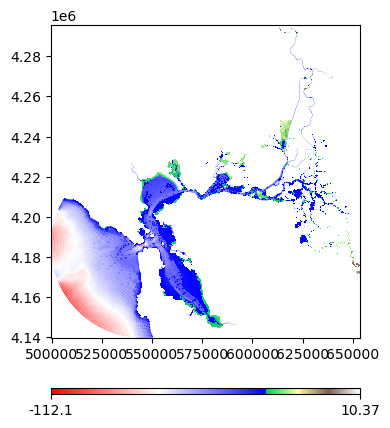

<Axes: >

In [11]:
hgrid.make_plot(show=True)

In [12]:
hgrid.values

array([-2.99301107, -2.99193361, -2.9947583 , ..., -3.58830846,
       -3.49004975, -3.54894279])

In [13]:
hgrid.values.max()

10.37297048

In [14]:
hgrid.values.min()

-112.10148998

In [15]:
depth=(hgrid.values-hgrid.values.max())*-1
print(np.max(depth))

122.47446045999999


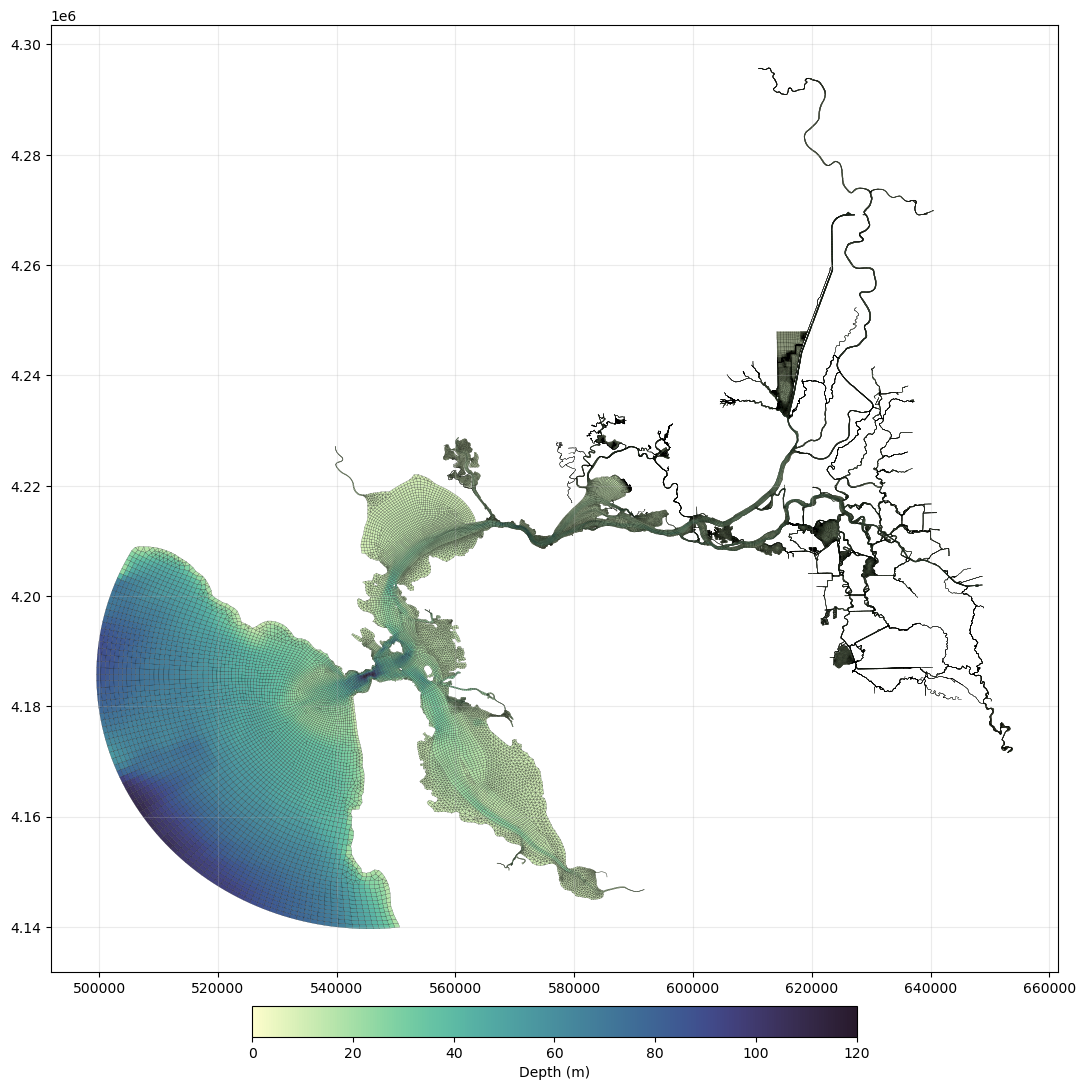

In [16]:
fig = plt.figure(figsize=(13,15))
ax = plt.gca()
climit=[0,120]
cmap = cmocean.cm.deep
#imola_r
args = {'vmin': np.min(depth), 'vmax': np.max(depth)}
args['cmap'] = cmap
ax.tripcolor(hgrid.x,hgrid.y,hgrid.triangles,depth,shading='flat',**args,linewidth=0.12,edgecolors='k')
pc = PolyCollection(hgrid.coords[hgrid.quads], clim=climit, cmap=cmap,linewidth=0.12)
quad_value = np.mean(depth[hgrid.quads], axis=1)  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
            #quad_value = np.mean(schism_output.hgrid.quads, axis=1)
pc.set_array(quad_value)
# pc.set_edgecolor('face')
pc.set_edgecolor('k')
ax.add_collection(pc)
ax.grid(alpha = 0.25) 
cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6,pad=0.03)
cbar.set_label("Depth (m)")
fig.savefig('Whole_domain_grid.png')
#ax = self.set_domain(domain, ax)

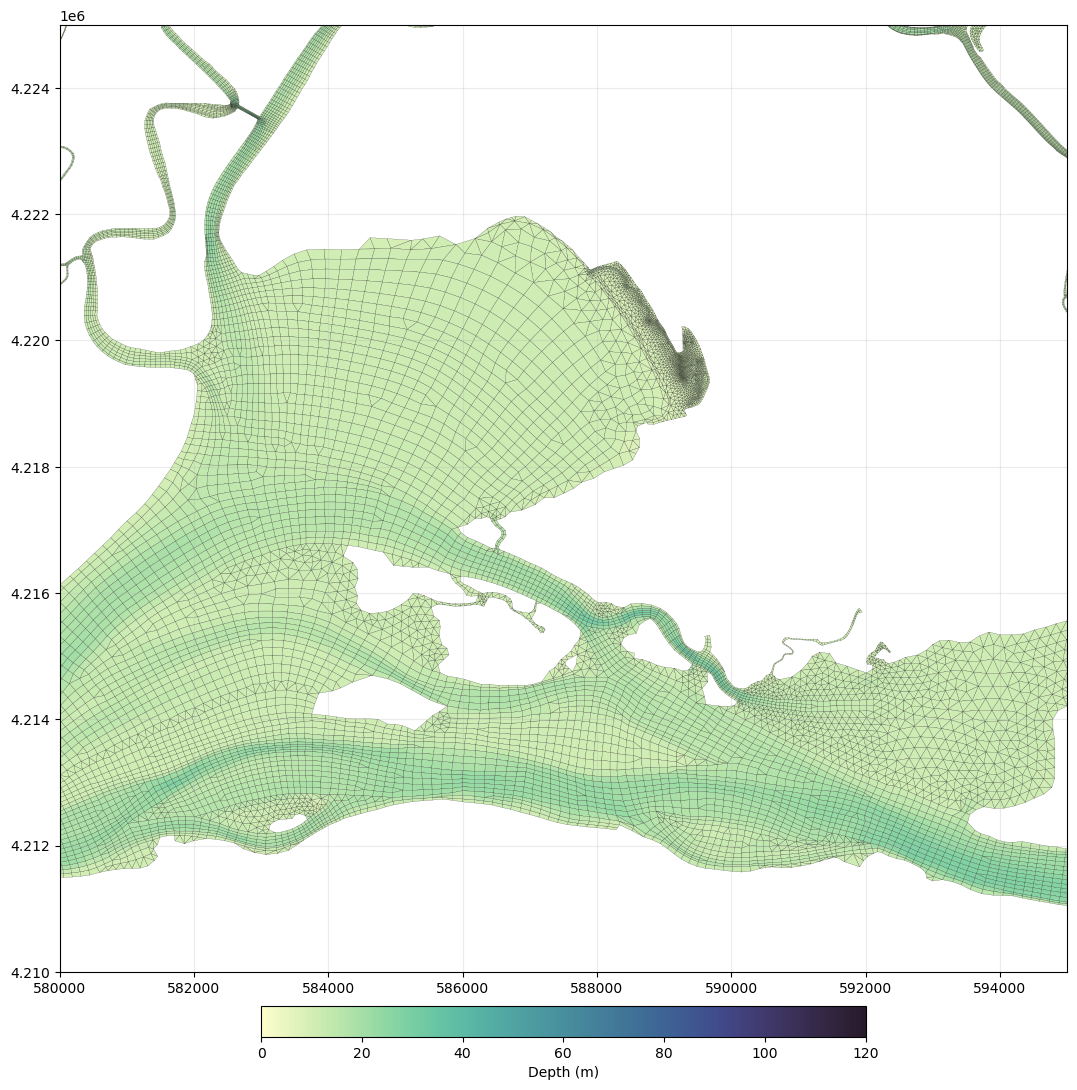

In [17]:
fig2 = plt.figure(figsize=(13,15))
ax2 = plt.gca()
ax2.tripcolor(hgrid.x,hgrid.y,hgrid.triangles,depth,shading='flat',**args,linewidth=0.12,edgecolors='k')
pc = PolyCollection(hgrid.coords[hgrid.quads], clim=climit, cmap=cmap,linewidth=0.12)
quad_value = np.mean(depth[hgrid.quads], axis=1)  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
            #quad_value = np.mean(schism_output.hgrid.quads, axis=1)
pc.set_array(quad_value)
# pc.set_edgecolor('face')
pc.set_edgecolor('k')
ax2.add_collection(pc)
ax2.set_xlim([580000,595000])
ax2.set_ylim([4.21e6,4.225e6])
ax2.grid(alpha = 0.25) 
cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6,pad=0.03)
cbar.set_label("Depth (m)")
fig2.savefig('subset_domain_grid.png')

In [18]:
hgrid.__dir__()

['nodes',
 'elements',
 'description',
 'hull',
 '_boundaries',
 '__module__',
 '__doc__',
 '__init__',
 'open',
 'to_dict',
 'copy',
 'make_plot',
 'boundaries',
 'ocean_boundaries',
 'land_boundaries',
 'interior_boundaries',
 '__abstractmethods__',
 '_abc_impl',
 '__str__',
 'write',
 'get_xy',
 'get_xyz',
 'get_bbox',
 'invert_sign',
 'transform_to',
 'vertices_around_vertex',
 'tricontourf',
 'tripcolor',
 'triplot',
 'quadplot',
 'quadface',
 'wireframe',
 'coords',
 'coord',
 'vertices',
 'vertex_id',
 'element_id',
 'values',
 'crs',
 'x',
 'y',
 'triangles',
 'quads',
 'triangulation',
 'bbox',
 'md5',
 '__dict__',
 '__weakref__',
 '__slots__',
 '__repr__',
 '__hash__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [19]:
decreased=pd.read_csv('/global/scratch/users/jennaisrael/run_schism/run_17/flux_0.75.txt',sep="\t", header=None)
base=pd.read_fwf('/global/scratch/users/jennaisrael/run_schism/run_16/flux.th',sep=" ", header=None)
increased=pd.read_csv('/global/scratch/users/jennaisrael/run_schism/run_18/flux_1.25.txt',sep="\t", header=None)
decreased.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,-0.55,0.0,2.3775,98.03,75.77,-49.84,0.0,-16.96,-80.7,-412.30,-9.71,0.0,0.72,0.0,0.0
1,900,-0.55,0.0,2.3700,110.46,75.84,-49.84,0.0,-17.04,-80.7,-412.25,-10.28,0.0,0.71,0.0,0.0
2,1800,-0.54,0.0,2.3625,121.44,75.90,-49.84,0.0,-16.96,-80.7,-412.19,-9.54,0.0,0.70,0.0,0.0
3,2700,-0.54,0.0,2.3550,128.98,75.95,-49.84,0.0,-17.05,-80.7,-412.14,-9.37,0.0,0.69,0.0,0.0
4,3600,-0.53,0.0,2.3475,133.01,75.99,-49.84,0.0,-17.05,-80.7,-412.08,-9.54,0.0,0.69,0.0,0.0


In [20]:
check=pd.read_fwf('/global/scratch/users/jennaisrael/run_schism/run_16/flux.th',sep=" ", header=None)
check.head()

,0,1,2,3,4
0,0.0,-0.55,0.00,3.17,98.03 75.77 -49.84 -0.00 -16.96 -80.70 -412.30...
1,900.0,-0.55,0.00,3.16,110.46 75.84 -49.84 -0.00 -17.04 -80.70 -412.2...
2,1800.0,-0.54,0.00,3.15,121.44 75.90 -49.84 -0.00 -16.96 -80.70 -412.1...
3,2700.0,-0.54,0.00,3.14,128.98 75.95 -49.84 -0.00 -17.05 -80.70 -412.1...
4,3600.0,-0.53,0.00,3.13,133.01 75.99 -49.84 -0.00 -17.05 -80.70 -412.0...


In [21]:
base[3][:3].astype(float)

0    3.17
1    3.16
2    3.15
Name: 3, dtype: float64

In [22]:
#timev=pd.timedelta_range(start='15 H', end=endstr, freq=freqstr)
timev=pd.date_range(start='7/1/2019', end='10/1/2019', freq='15 min')
print(timev)

DatetimeIndex(['2019-07-01 00:00:00', '2019-07-01 00:15:00',
               '2019-07-01 00:30:00', '2019-07-01 00:45:00',
               '2019-07-01 01:00:00', '2019-07-01 01:15:00',
               '2019-07-01 01:30:00', '2019-07-01 01:45:00',
               '2019-07-01 02:00:00', '2019-07-01 02:15:00',
               ...
               '2019-09-30 21:45:00', '2019-09-30 22:00:00',
               '2019-09-30 22:15:00', '2019-09-30 22:30:00',
               '2019-09-30 22:45:00', '2019-09-30 23:00:00',
               '2019-09-30 23:15:00', '2019-09-30 23:30:00',
               '2019-09-30 23:45:00', '2019-10-01 00:00:00'],
              dtype='datetime64[ns]', length=8833, freq='15min')


In [23]:
timev.shape


(8833,)

In [24]:
base[3][:8833].astype(float)

0       3.17
1       3.16
2       3.15
3       3.14
4       3.13
        ... 
8828    5.92
8829    5.92
8830    5.92
8831    5.92
8832    5.92
Name: 3, Length: 8833, dtype: float64

In [25]:
increased[3][:8833]

0       3.9625
1       3.9500
2       3.9375
3       3.9250
4       3.9125
         ...  
8828    7.4000
8829    7.4000
8830    7.4000
8831    7.4000
8832    7.4000
Name: 3, Length: 8833, dtype: float64

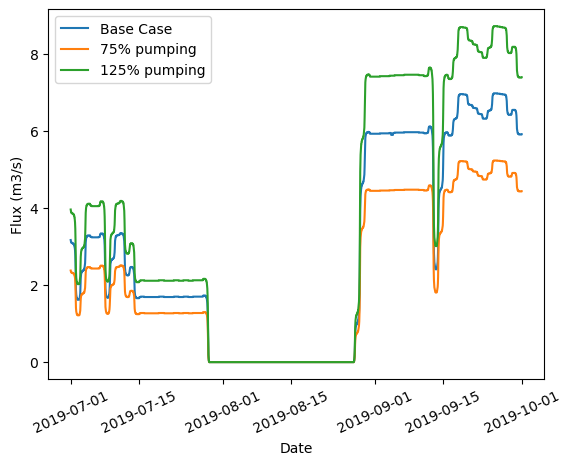

In [32]:
#plt.rcParams['text.usetex'] = False
fig = plt.figure() 
ax = plt.gca()
ax.plot(timev,base[3][:8833].astype(float),label='Base Case')
ax.plot(timev,decreased[3][:8833],label='75% pumping')
ax.plot(timev,increased[3][:8833],label='125% pumping')
ax.set_xlabel('Date')
ax.set_ylabel('Flux (m3/s)')
#ax.set_xlim(['2019-08-15','2019-09-09'])
plt.xticks(rotation = 25)
plt.legend()
plt.show()

In [21]:
hgrid.__dict__.keys()

dict_keys(['nodes', 'elements', 'description', 'hull', '_boundaries'])

In [45]:
hgrid.land_boundaries

,id,ibtype,index_id,indexes,geometry
0,1,0,"[22022, 22176, 22336, 22502, 22677, 22861, 230...","[22021, 22175, 22335, 22501, 22676, 22860, 230...","LINESTRING (550625.000 4139945.000, 550363.000..."
1,2,0,"[18175, 18271, 18374, 18480, 18587, 18695, 188...","[18174, 18270, 18373, 18479, 18586, 18694, 188...","LINESTRING (591787.100 4146793.800, 591684.800..."
2,3,0,"[197057, 197251, 197447, 197643, 197850, 19806...","[197056, 197250, 197446, 197642, 197849, 19806...","LINESTRING (619377.460 4204002.620, 619420.070..."
3,4,0,"[262512, 262563, 262615, 262666, 262717, 26277...","[262511, 262562, 262614, 262665, 262716, 26276...","LINESTRING (625164.890 4194302.240, 625163.296..."
4,5,0,"[270025, 270115, 270206, 270296, 270385, 27048...","[270024, 270114, 270205, 270295, 270384, 27048...","LINESTRING (623650.131 4187444.710, 623666.189..."
5,6,0,"[277339, 277429, 277520, 277615, 277613, 27760...","[277338, 277428, 277519, 277614, 277612, 27760...","LINESTRING (626848.560 4186431.500, 626861.000..."
6,7,0,"[305807, 305799, 305790, 305781, 305770, 30575...","[305806, 305798, 305789, 305780, 305769, 30575...","LINESTRING (653062.300 4171530.900, 653090.218..."
7,8,0,"[260381, 260442, 260505, 260566, 260628, 26069...","[260380, 260441, 260504, 260565, 260627, 26069...","LINESTRING (646809.600 4205083.800, 646776.229..."
8,9,0,"[75474, 75657, 75840, 76020, 76200, 76381, 765...","[75473, 75656, 75839, 76019, 76199, 76380, 765...","LINESTRING (637138.537 4235605.900, 637109.827..."
9,10,0,"[3962, 3971, 3981, 3992, 4004, 4015, 4026, 403...","[3961, 3970, 3980, 3991, 4003, 4014, 4025, 403...","LINESTRING (640505.500 4269969.300, 640444.226..."


(491833.817, 661508.223, 4131845.1229999997, 4303572.657000001)

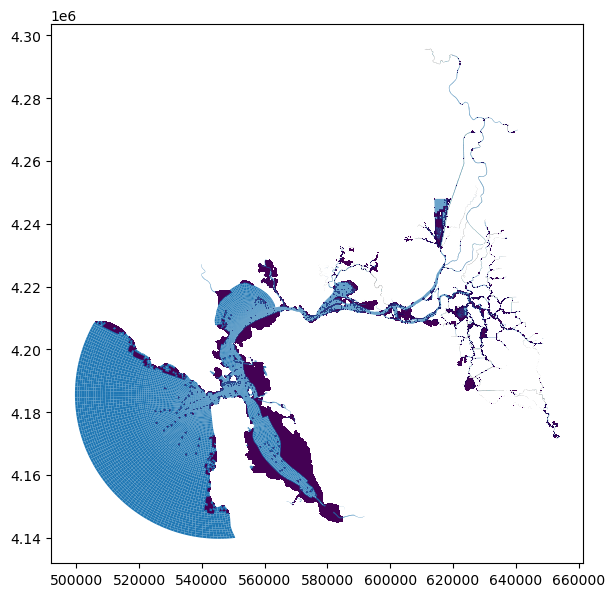

In [14]:
plt.rcParams["figure.figsize"] = (16,17)
fig = plt.figure() 
ax = plt.gca()
c=np.zeros(hgrid.triangles.shape[0]) #make the faces white to see the grid
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles,facecolors=c)#, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
#pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000) #about square
#ax.set_xlim(600000, 625000)#,650000)
#ax.set_ylim(4.2*10**6,4.25*10**6)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
#cbar = plt.colorbar(pc, orientation="horizontal")

In [49]:
def get_timestamp_from_nc(ncdata, timestep):
    ''' input:
            ncdata   = xarray dataset of SCHISM output. 
            timestep = integer representing what timestep you hope to plot 
        returns: 
            formatted datetime string 
    '''
    date = ncdata.time.values[timestep]
    date = pd.to_datetime(date)
    formatted_timestamp= date.strftime("%b %d %Y, %H:%M")
    print("Model is at time = %s" % formatted_timestamp)
    return  formatted_timestamp

    # Get the start date (stored as an attribute class)
    base_date = ncdata.time.attrs['base_date']
    parts = base_date.split()

    # Extract the year, month, day, hour, and minute
    year, month, day, minute, hour = map(float, parts)
    if day==0.0:
        day = 1

    # Convert to datetime 
    base = pd.Timestamp(year=round(year), month=round(month), day=round(day), hour=round(hour), minute=round(minute))

    # Add in the number of seconds elapsed @ our chosen timestep
    timedelta = pd.Timedelta(int(ncdata.time.values[timestep]), unit = 's')
    timestamp = base + timedelta
    formatted_timestamp = timestamp.strftime("%b %d %Y, %H:%M")
    print("Model is at time = %s" % formatted_timestamp)
    print("Model has been running for %s hours" % timedelta)
    return formatted_timestamp



In [50]:
#load some salinity datafiles and see how to aggregate them
sal_20=xr.open_dataset('/global/scratch/users/jennaisrael/run_schism/run_8/outputs/salinity_20.nc')
get_timestamp_from_nc(sal_20, 0)

Model is at time = Mar 06 2018, 16:30


'Mar 06 2018, 16:30'

In [5]:
#try aggregating the salinity files for the base case run
for 

<xarray.Dataset> Size: 540B
Dimensions:   (time: 5, nSCHISM_hgrid_node: 5, nSCHISM_vgrid_layers: 5)
Coordinates:
  * time      (time) datetime64[ns] 40B 2018-03-06T16:30:00 ... 2018-03-06T18...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 500B ...

In [ ]:
#load all the salinity files, take a depth average 

In [ ]:
timestep = 1
sal_data = xr.open_dataset(salinity, decode_times=False)

temp_data = xr.open_dataset(temp, decode_times=False)
# temp = temp_data.temperature.mean(dim='time').isel(nSCHISM_vgrid_layers=20).values #mean(dim='nSCHISM_vgrid_layers').values
# salinity = sal_data.salinity.mean(dim='time').isel(nSCHISM_vgrid_layers=20).values #mean(dim='nSCHISM_vgrid_layers').values
temp = temp_data.temperature.mean(dim='time', skipna=True).mean(dim='nSCHISM_vgrid_layers').values
salinity = sal_data.salinity.mean(dim='time', skipna=True).mean(dim='nSCHISM_vgrid_layers').values


# salinity = salinity.mean(dim='nSCHISM_vgrid_layers').values
# temp = temp.mean(dim='nSCHISM_vgrid_layers').values

print(temp_data)
print("Mean=")
print(np.nanmean(temp))

# In[ ]:


# Pull data for velocity field (this is model output)

# u_data = xr.open_dataset(uvel, decode_times=False)
# v_data = xr.open_dataset(vvel, decode_times=False)

# timestep = 47

timestamp = get_timestamp_from_nc(sal_data, timestep)

In [ ]:
def make_figure(variable, variable_name, vmin, vmax):

  proj = crs.UTM(10)
  fig = plt.figure(figsize=(13,13))
  ax = plt.gca()

  cmap = ccm.imola_r # cmocean.haline #

  with rasterio.open(basemap) as src:
    i = show(src, transform = src.transform, cmap='binary', ax = ax)

  args = {'vmin': vmin, 'vmax': vmax}
  climits= [args['vmin'], args['vmax']]
  args['cmap'] = cmap

  values = variable # salinity
  ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, values, shading='flat', **args) #linewidth=0.2,
  pc = PolyCollection(hgrid.coords[hgrid.quads], clim=climits, cmap=cmap)

  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
  quad_value = np.mean(values[hgrid.quads], axis=1)

  pc.set_array(quad_value)
  pc.set_edgecolor('face')
  ax.add_collection(pc)

  # # Whole Delta
  # ax.set_xlim(561916,691396)
  # ax.set_ylim(4175849, 4273290)

  # South Delta
  # ax.set_xlim(607332,656086)
  # ax.set_ylim(4184679, 4221602)

  # Stockton Shipping Channel
  ax.set_xlim(640781.2, 651441.3)
  ax.set_ylim(4200092.1, 4206992.1)

  cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6)
  # ax.axis("scaled")
  title = "SCHISM time-averaged %s @ %s" % (variable_name, timestamp)
    t = ax.set_title(title)
  # plt.tight_layout()
  fig.savefig("%s_ZOOMED.png" % title, dpi=300)
  return

In [ ]:
make_figure(salinity, "salinity", 0, 40)

make_figure(temp, "temperature", 10, 20)

In [ ]:
# hgrid_raw =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_16/hgrid.nc")
# hgrid_raw.head()

In [ ]:
# #rename variables
# newnames={'hgrid_node_x':'x',
#           'hgrid_node_y':'y',
          
# hgrid=hgrid_raw

In [ ]:
# # hgrid.make_plot(show=True)

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# from matplotlib.collections import PolyCollection
# # axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# # plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

# fig = plt.figure() 
# ax = plt.gca()
# ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

# pc = PolyCollection(hgrid.coords[hgrid.quads])
# # quad_value = np.mean(self.values[self.quads], axis=1)
# # pc.set_array(quad_value)
# pc.set_array(velocity)
# ax.add_collection(pc)
            
            
# # hgrid.quadface(ax=ax)
# ax.set_xlim(550000, 650000)
# # ax.axis([550000, 650000, 4.14e6, 4.3e6])
# ax.axis("scaled")
# cbar = plt.colorbar(pc, orientation="horizontal")
# # hgrid.triplot()
# # tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
# #         if len(self.triangles) > 0:
# #             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# #         return axes